In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import pathlib
import imageio
import numpy as np

# Glob the training data and load a single image path
training_paths = pathlib.Path('../input/stage1_train').glob('*/images/*.png')
training_sorted = sorted([x for x in training_paths])
im_path = training_sorted[45]
im = imageio.imread(str(im_path))

In [3]:
len(training_sorted)

670

In [4]:
img = cv2.imread(str(im_path),0)  #0 for greyscale
img.shape
from skimage.filters import threshold_otsu
t=threshold_otsu(img)
print(t)
m=np.mean(img)
print(m)

21
6.84044263926


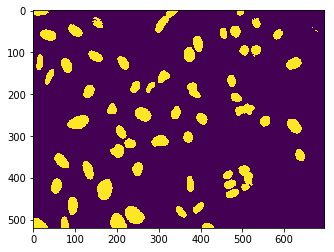

In [165]:
img_t=np.where(img>t,1,0)
plt.imshow(img_t)

In [152]:
img[0]

array([ 3,  3,  7, 13, 18, 19, 23, 25, 26, 25, 24, 23, 25, 26, 26, 31, 30,
       28, 28, 26, 28, 28, 30, 33, 30, 30, 33, 31, 30, 29, 30, 33, 34, 31,
       28, 24, 24, 22, 23, 21, 20, 19, 14,  8,  5,  3,  3,  2,  2,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        3,  4,  3,  4,  4,  4,  5,  5,  5,  4,  3,  3,  3,  3,  3,  2,  3,
        2,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  1,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

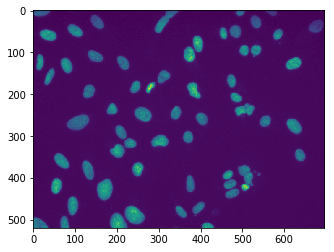

In [10]:

plt.imshow(img)

In [136]:


def threshold(image,T):
    image_T=np.empty([image.shape[0],image.shape[1]])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j]<T:
                image_T[i][j]=1.0
            else:
                image_T[i][j]=image[i][j]
    return image_T
    

In [137]:
img_t=threshold(img,10.0)

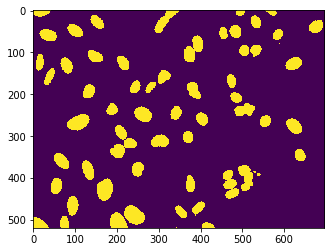

In [144]:
plt.imshow(img_t)

In [139]:
def threshold_M(image):
    image_T=np.empty([image.shape[0],image.shape[1]])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j]<np.mean(image[i]):
                image_T[i][j]=0
            else:
                image_T[i][j]=1
    return image_T

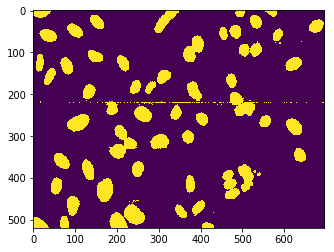

In [141]:
img_TM=threshold_M(img)
plt.imshow(img_TM)

In [41]:
from scipy import ndimage
labels, nlabels = ndimage.label(img_t)  #labelling masks - nuclei

# label_arrays = []
for label_num in range(1, nlabels+1):
    label_mask = np.where(labels == label_num, 1, 0)
#     label_arrays.append(label_mask)

# print('There are {} separate components / objects detected.'.format(nlabels))

# print(mask)
# print(label_mask)
range(1,nlabels+1)
label_mask[519]
labels[519]
img.shape
520*696

img.flatten()[]

array([3, 3, 7, ..., 2, 2, 2], dtype=uint8)

In [34]:
#img[0]
a=np.array([2,2,1,1])
np.where(a==2,1,0)

array([1, 1, 0, 0])

In [81]:
img.shape

(520, 696)

In [85]:
a=np.empty([520,696])
a.shape

(520, 696)

In [44]:
def rle_encoding(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return " ".join([str(i) for i in run_lengths])

#print('RLE Encoding for the current mask is: {}'.format(rle_encoding(label_mask)))

In [46]:
x=np.array([0,0,1,1,1,0,1,0,0,1])
rle_encoding(x)

'3 3 7 1 10 1'

In [147]:
rle_encoding(img_t)
#img_t[0]

array([ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [135]:
a=np.array([1.0,2.0,3.0])
np.where(a>1.0,1,0)


array([0, 1, 1])

In [131]:
x = np.arange(9.).reshape(3, 3)
x[np.where( x > 5 ,1,0 )]

array([[[ 0.,  1.,  2.],
        [ 0.,  1.,  2.],
        [ 0.,  1.,  2.]],

       [[ 0.,  1.,  2.],
        [ 0.,  1.,  2.],
        [ 0.,  1.,  2.]],

       [[ 3.,  4.,  5.],
        [ 3.,  4.,  5.],
        [ 3.,  4.,  5.]]])

In [140]:
mask=np.where(img>5.0,1,0)
mask.shape

(520, 696)

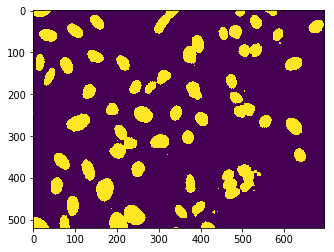

In [141]:
plt.imshow(mask)

In [198]:
import pandas as pd
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

def analyze_image_otsuT(im_path):
    '''
    Take an image_path (pathlib.Path object), preprocess and label it, extract the RLE strings 
    and dump it into a Pandas DataFrame.
    '''
    # Read in data and convert to grayscale
    im_id = im_path.parts[-3]
    im = imageio.imread(str(im_path))
    im_gray = rgb2gray(im)
    
    # Mask out background and extract connected objects
    thresh_val = threshold_otsu(im_gray)
    mask = np.where(im_gray > thresh_val, 1, 0)
    if np.sum(mask==0) < np.sum(mask==1):
        mask = np.where(mask, 0, 1)    
        labels, nlabels = ndimage.label(mask)
    labels, nlabels = ndimage.label(mask)
    
    # Loop through labels and add each to a DataFrame
    im_df = pd.DataFrame()
    for label_num in range(1, nlabels+1):
        label_mask = np.where(labels == label_num, 1, 0)
        if label_mask.flatten().sum() > 10:
            rle = rle_encoding(label_mask)
            s = pd.Series({'ImageId': im_id, 'EncodedPixels': rle})
            im_df = im_df.append(s, ignore_index=True)
    
    return im_df


def analyze_list_of_images_otsuT(im_path_list):
    '''
    Takes a list of image paths (pathlib.Path objects), analyzes each,
    and returns a submission-ready DataFrame.'''
    all_df = pd.DataFrame()
    for im_path in im_path_list:
        im_df = analyze_image_otsuT(im_path)
        all_df = all_df.append(im_df, ignore_index=True)
    
    return all_df

In [199]:
import time
t0 = time.time()

testing = pathlib.Path('../input/stage1_test/').glob('*/images/*.png')
df = analyze_list_of_images_otsuT(list(testing))
df.to_csv('submissionThresh_otsu.csv', index=None)

t1=time.time()
total=t1-t0
print(total)

9.20859313011


In [200]:
df

,EncodedPixels,ImageId
0,15366 1 15619 4 15874 6 16130 5 16385 4 16641 ...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
1,37889 1 37891 2 38145 5 38401 5 38657 6 38913 ...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
2,61186 2 61441 3 61697 6 61953 6 62209 6 62465 ...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
3,8201 2 8454 9 8710 10 8965 12 9221 12 9477 12 ...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
4,27916 1 27918 2 28172 7 28427 9 28682 11 28938...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
5,50446 5 50701 7 50957 8 51212 9 51469 9 51724 ...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
6,34834 6 35089 8 35344 10 35598 13 35853 14 361...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
7,56855 6 57109 9 57364 10 57620 10 57875 11 581...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
8,61464 2 61719 4 61973 7 62228 10 62484 9 62740...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
9,18715 7 18969 10 19224 12 19480 12 19735 13 19...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...


In [201]:


def analyze_image_meanT(im_path):
    '''
    Take an image_path (pathlib.Path object), preprocess and label it, extract the RLE strings 
    and dump it into a Pandas DataFrame.
    '''
    # Read in data and convert to grayscale
#     im_id = im_path.parts[-3]
#     im = imageio.imread(str(im_path))
#     im_gray = rgb2gray(im)
    im_id = im_path.parts[-3]
    im=cv2.imread(str(im_path),0)
    
    # Mask out background and extract connected objects
#     thresh_val = threshold_otsu(im_gray)
#     mask = np.where(im_gray > thresh_val, 1, 0)
#     if np.sum(mask==0) < np.sum(mask==1):
#         mask = np.where(mask, 0, 1)    
#         labels, nlabels = ndimage.label(mask)
#     labels, nlabels = ndimage.label(mask)
    thresh_val = np.mean(im)
    mask=np.where(im>thresh_val,1,0)
    labels, nlabels = ndimage.label(mask)
    if np.sum(mask==0) < np.sum(mask==1):
        mask = np.where(mask, 0, 1)    
        labels, nlabels = ndimage.label(mask)
    labels, nlabels = ndimage.label(mask)
    
    # Loop through labels and add each to a DataFrame
    im_df = pd.DataFrame()
    for label_num in range(1, nlabels+1):
        label_mask = np.where(labels == label_num, 1, 0)
        if label_mask.flatten().sum() > 10:
            rle = rle_encoding(label_mask)
            s = pd.Series({'ImageId': im_id, 'EncodedPixels': rle})
            im_df = im_df.append(s, ignore_index=True)
    
    return im_df


def analyze_list_of_images_meanT(im_path_list):
    '''
    Takes a list of image paths (pathlib.Path objects), analyzes each,
    and returns a submission-ready DataFrame.'''
    all_df = pd.DataFrame()
    for im_path in im_path_list:
        im_df = analyze_image_meanT(im_path)
        all_df = all_df.append(im_df, ignore_index=True)
    
    return all_df

In [202]:
import time
t0 = time.time()
testing = pathlib.Path('../input/stage1_test/').glob('*/images/*.png')
df = analyze_list_of_images_meanT(list(testing))
df.to_csv('submissionThres_mean.csv', index=None)
t1 = time.time()

total=t1-t0
print(total)

96.6517291069


In [197]:
df

,EncodedPixels,ImageId
0,14341 3 14594 11 14849 13 15105 13 15361 14 15...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
1,36866 3 37121 6 37377 7 37633 8 37889 9 38145 ...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
2,60929 3 61185 5 61441 6 61697 7 61953 7 62209 ...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
3,7435 1 7686 8 7941 11 8196 13 8452 14 8707 16 ...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
4,26895 1 27148 7 27403 9 27658 11 27672 4 27913...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
5,49677 8 49932 10 50187 12 50202 12 50442 13 50...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
6,34066 6 34082 4 34320 9 34336 8 34575 12 34591...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
7,60949 7 61203 11 61458 13 61472 1 61713 16 619...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
8,17948 6 18201 11 18456 13 18711 14 18966 16 19...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...
9,38960 6 39214 9 39470 10 39725 11 39980 13 402...,912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea...


In [119]:
testing_paths = pathlib.Path('../input/stage1_test').glob('*/images/*.png')
testing_sorted = sorted([x for x in testing_paths])
testing_sorted[0].parts[-3]

'0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5'

In [122]:
from skimage.morphology import label

def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = label(y_true_in > 0.5)
    y_pred = label(y_pred_in > 0.5)
    
    true_objects = len(np.unique(labels))
    pred_objects = len(np.unique(y_pred))

    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection

    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Compute the intersection over union
    iou = intersection / union

    # Precision helper function
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # Correct objects
        false_positives = np.sum(matches, axis=0) == 0  # Missed objects
        false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Loop over IoU thresholds
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)


In [218]:
img = cv2.imread(str(im_path),0)
imgT_mean=np.where(img>np.mean(img),1,0)
imgT_otsu=np.where(img>threshold_otsu(img),1,0)
imgT=np.where(img>25,1,0)

In [180]:
iou_metric(img,imgT_otsu,True)

Thresh	TP	FP	FN	Prec.
0.500	0	67	1	0.000
0.550	0	67	1	0.000
0.600	0	67	1	0.000
0.650	0	67	1	0.000
0.700	0	67	1	0.000
0.750	0	67	1	0.000
0.800	0	67	1	0.000
0.850	0	67	1	0.000
0.900	0	67	1	0.000
0.950	0	67	1	0.000
AP	-	-	-	0.000


0.0

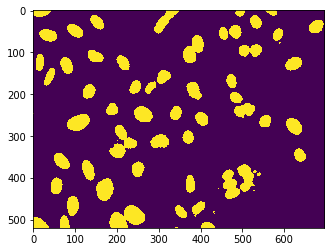

In [211]:
plt.imshow(imgT_mean)

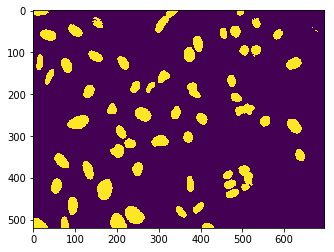

In [212]:
plt.imshow(imgT_otsu)

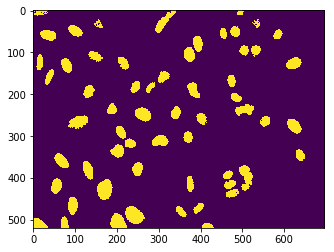

In [219]:
plt.imshow(imgT)

In [40]:
training_masks = pathlib.Path('../input/stage1_train').glob('*/masks/*.png')
training_masks_sorted = sorted([x for x in training_masks])
len(training_masks_sorted)
mask_path=training_masks_sorted[1]

In [41]:
img = cv2.imread(str(mask_path),0) 
type(str(mask_path))

str

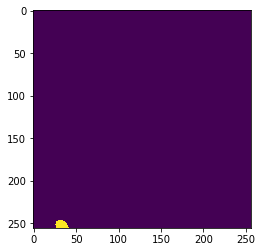

In [247]:
plt.imshow(img)

In [248]:
img[252]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [81]:
def zero_count(x):
    k=0
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i][j]==0:
                k+=1
    return k

def one_count(x):
    k=0
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i][j]==255:
                k+=1
    return k

In [250]:
print(zero_count(img))
print(one_count(img))
print(zero_count(img)+one_count(img))
print(img.shape[0]*img.shape[1])

65424
112
65536
65536


In [55]:
image_1 = ''.join(["../input/stage1_train/"
                  "0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9/"
                  "images/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png"])

In [59]:
img=cv2.imread(image_1,0)

In [57]:
image_1

'../input/stage1_train/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9/images/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png'

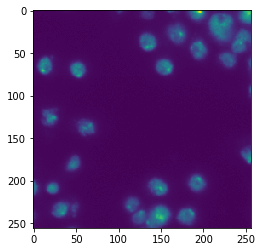

In [91]:
plt.imshow(img)

In [70]:
masks_1 = ''.join(["../input/stage1_train/", 
                   "0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9/masks"])
path_masks_1=''.join([masks_1,"/*.png"])
path_masks_1

'../input/stage1_train/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9/masks/*.png'

In [100]:


import glob



images = [cv2.imread(file,0) for file in glob.glob(path_masks_1)]



In [89]:
print(zero_count(images[0]))
print(one_count(images[1]))
print(images[0].shape[0]*images[0].shape[1])

65278
270
65536


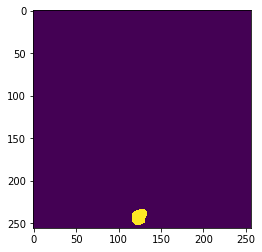

In [92]:
plt.imshow(images[1])

In [93]:
images=np.where(images>0,1,0)

In [94]:
imgT_mean=np.where(img>np.mean(img),1,0)
#imgT_otsu=np.where(img>threshold_otsu(img),1,0)

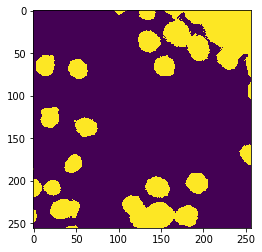

In [97]:
plt.imshow(imgT_mean)

In [98]:
imgT_mean

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [102]:
images[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)